In [1]:
!ls ../../input/

key_1.csv               sample_submission_1.csv train_1.csv


## Read data

In [26]:
import pandas as pd

df = pd.read_csv('../../input/train_1.csv',index_col="Page")
df.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
Page,,,,,,,,,,,,,,,,,,,,,
2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


## Stack data

In [27]:
df.stack().head()

Page                                               
2NE1_zh.wikipedia.org_all-access_spider  2015-07-01    18.0
                                         2015-07-02    11.0
                                         2015-07-03     5.0
                                         2015-07-04    13.0
                                         2015-07-05    14.0
dtype: float64

## Web traffic is highly skewed

In [65]:
%matplotlib inline 
import matplotlib.pylab as plt
import numpy as np

x=np.array(df.stack())
# plt.hist(x,bins=1000)
# plt.xlim([0,10000])

## Remove skewness using log1p

(0, 20)

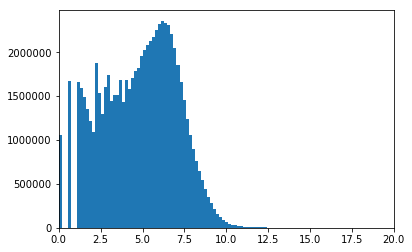

In [67]:
plt.hist(np.log1p(x),bins=100)
plt.xlim([0,20])

In [30]:
from scipy.stats import skew
print skew(x)
print skew(np.log(x+0.2))
print skew(np.log1p(x))

349.829362185
-0.284839122537
-0.0958702422246


## Multiple peaks in the distribution

### web traffic median

In [43]:
xmedian = np.array(df.median(axis=1).fillna(0))

(0, 20)

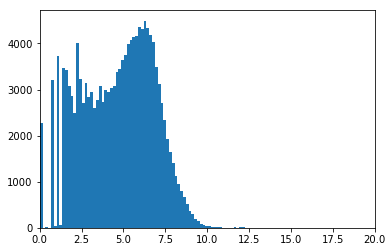

In [60]:
plt.hist(np.log1p(xmedian),bins=100)
plt.xlim([0,20])

### web traffic mean

In [48]:
xmean = np.array(df.mean(axis=1).fillna(0))

(0, 20)

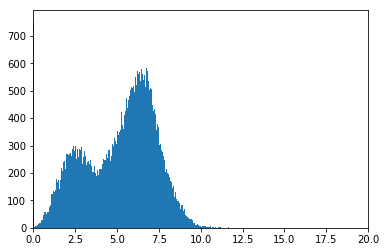

In [57]:
plt.hist(np.log1p(xmean),bins=1000)
plt.xlim([0,20])

### web traffic max

In [50]:
xmax = np.array(df.max(axis=1).fillna(0))

(0, 20)

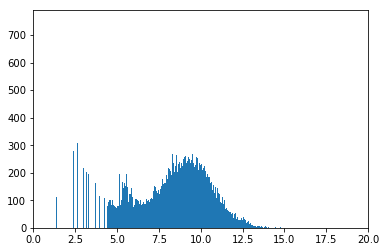

In [55]:
plt.hist(np.log1p(xmax),bins=2000)
plt.xlim([0,20])

### web traffic min

In [53]:
xmin = np.array(df.min(axis=1).fillna(0))

(0, 20)

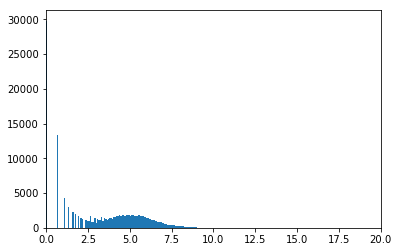

In [59]:
plt.hist(np.log1p(xmin),bins=200)
plt.xlim([0,20])

## Why two peaks

In [73]:
xmeandf = df.mean(axis=1).fillna(0).map(np.log1p)

### find boundry according to std

In [93]:
ths = np.linspace(2,5,301)
stds = []
stdmin = 100
thmin = 0
for i in ths:
    std = xmeandf[xmeandf<i].std()+xmeandf[xmeandf>=i].std()
    if std<stdmin:
        stdmin = std
        thmin = i
    stds.append(std)
print thmin

3.7


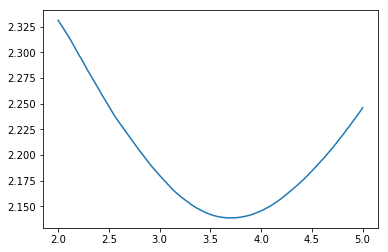

In [95]:
plt.plot(ths,stds)

### agent and access

In [227]:
xmeandf.head()

Page
2NE1_zh.wikipedia.org_all-access_spider                3.124845
2PM_zh.wikipedia.org_all-access_spider                 3.273088
3C_zh.wikipedia.org_all-access_spider                  1.825136
4minute_zh.wikipedia.org_all-access_spider             2.897317
52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider    2.422853
dtype: float64

In [189]:
data = pd.DataFrame()
data['access']=xmeandf.index.map(lambda x: x.split("_")[-2])
data['agent']=xmeandf.index.map(lambda x: x.split("_")[-1])
data['target']=list(1*(xmeandf>=3.7))

In [193]:
data.agent.value_counts()

all-agents    110150
spider         34913
Name: agent, dtype: int64

In [198]:
data.access.value_counts()

all-access    74315
mobile-web    35939
desktop       34809
Name: access, dtype: int64

### media and page

In [236]:
def getLang(x):
    if '.wikipedia.org' in x.lower():
        return x.lower().split(".wikipedia.org")[0].split("_")[-1]
    else:
        return "media"
        
data['lang']=xmeandf.index.map(getLang)

In [237]:
data.lang.value_counts()

en       24108
ja       20431
de       18547
media    17855
fr       17802
zh       17229
ru       15022
es       14069
Name: lang, dtype: int64

### random forest

In [263]:
X = pd.DataFrame()
X = X.merge(pd.get_dummies(data.access,prefix='access'),how='right',left_index=True,right_index=True)
X = X.merge(pd.get_dummies(data.agent,drop_first=True,prefix='agent'),how='right',left_index=True,right_index=True)
X = X.merge(pd.get_dummies(data.lang,prefix='lang'),how='right',left_index=True,right_index=True)

y = data.target

In [264]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(30)
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [265]:
impts = zip(*sorted(zip(list(X.columns.values),rfc.feature_importances_),key=lambda x: x[-1]))

([<matplotlib.axis.YTick at 0x140148890>,
 <a list of 12 Text yticklabel objects>)

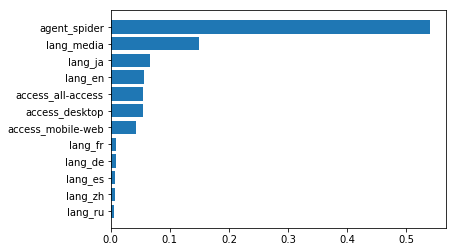

In [266]:
plt.barh(range(len(impts[1])),impts[1])
plt.yticks(range(len(impts[0])),impts[0])

In [270]:
print len(X[y==1][X.agent_spider==1])
print len(X[y==1][X.agent_spider==0])
print len(X[y==1])

8134
97748
105882


/Users/guoli/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/guoli/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [271]:
from sklearn.metrics import classification_report

print classification_report(y, rfc.predict(X))

             precision    recall  f1-score   support

          0       0.91      0.69      0.79     39181
          1       0.90      0.97      0.93    105882

avg / total       0.90      0.90      0.89    145063

